<a href="https://colab.research.google.com/github/BrianKEverett/County-Line/blob/main/Dissertation_Everett.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Installing coding packages here, not dissertation code

In [2]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 99.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6682abe26db26ea1566ae5549b039e95f15e3919fae92ad5d733f4ca391bb8a9
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

In [3]:
import time, os, sys, re
import zipfile, json, datetime, string
import numpy as np
from statistics import *

import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
import plotly.express as px

import missingno as msno

from google.colab import files

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 50

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

plt.style.use('classic')

##Loading in datasets from GitHub
##Green text explains where data came from and how to find it

In [4]:
permits=pd.read_csv("https://raw.githubusercontent.com/BrianKEverett/County-Line/main/Permits.csv")
# dataset can be found here: https://njdca.maps.arcgis.com/home/item.html?id=c754e8f800424bcbb6ad4e6e85b9f736 from NJ Dept of Community Affairs Website.
#this dataset was chosen mostly to assist with my dissertation proposal - I am seeking to explore the behaviors of planning boards in New Jersey, and one hypothesis I have is that planning board decisions are influenced by the effects of the County Line Balloting system, which is unique to 19 out of 21 counties in New Jersey. No other state in the US runs primary elections in this way.
#More on the County Line can be found here by Julia Sass Rubin: https://www.njpp.org/wp-content/uploads/2021/01/NJPP-Report-Does-the-County-Line-Matter-Update-wiht-Final-Vote-Counts.pdf

taxes=pd.read_csv ("https://raw.githubusercontent.com/BrianKEverett/County-Line/main/mediantax.csv")
# dataset can be retireved via: https://njdca.maps.arcgis.com/apps/webappviewer/index.html?id=96ec274c50a34890b23263f101e4ad9b from NJ Department of Community Affairs
# Another hypothesis I have is that the public narrative put forth by planning board members when approving controversial permits, "this will increase rateables for the township, lowering your taxes", does not actually come to fruition
#This data set is helpful for exploring that narrative, and seeing if the opposite is occurring, i.e. more development actually yields higher property taxes

#health=pd.read_csv ("https://raw.githubusercontent.com/BrianKEverett/County-Line/main/countyhealth.csv")
#dataset can be found here: https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation from County Health Rankings and Roadmaps, for 2022 to match same year of data for permits dataset
#With County Health Data, we can infer hypotheses about rates of development and the effect on well-being, liveability.

#Problem with health data set == only 22 observations for New Jersey, not a good sample.

municodes=pd.read_csv ("https://raw.githubusercontent.com/BrianKEverett/County-Line/main/Municodes.csv")
#Data file of all NJ municiaplities, and counties, with the corresponding municipalitiy DCA code. This data file will be most helpful for matching and merging.

#crime=pd.read_csv ("https://raw.githubusercontent.com/BrianKEverett/County-Line/main/CamdenCrime.csv") #not a good format for reading data!
#Dataset can be retireved here: https://www.nj.gov/njsp/ucr/uniform-crime-reports.shtml on the NJ Office of the Attorney General's website
#This crime data is important to consider when analyzing planning and zoning. Does any specific type of development correlate with increased crime? Can liveability theory be worked in here for whether or not communities have what they need to prevent crime?

jobs=pd.read_csv('https://raw.githubusercontent.com/BrianKEverett/County-Line/main/jobsdensity.csv')
#dataset can be built via the table selections on the NJ Community Affairs website - https://njdca.maps.arcgis.com/apps/webappviewer/index.html?id=96ec274c50a34890b23263f101e4ad9b
#Job density is a good variable to consider regarding new large dollar permits. Are some places growing more than others? Can this be attribute to the phenomenon of the County Line?

##Cleaning datasets by removing columns that are unnecessary, changing variable names to be text/code friendly while working, and changing string types as needed. Also manipulating font for better merging.

In [5]:
permits = permits.rename(columns={'DCA MUNI CODE': 'DCA'})
permits = permits.rename(columns={'MUNICIPALITY': 'Municipality'})
permits["Municipality"]= permits["Municipality"].str.title()
del permits['ID']
del permits['BLOCK NUMBER']
del permits['PAMS PIN']
del permits['USE GROUP']
del permits['YCOORD']
del permits['XCOORD']
del permits['MATCH TYPE']
del permits['LOT NUMBER']
del permits['DATE ISSUED']
del permits['TAX CODE']

del municodes['MUNICIPALITY_NAME_NJ-1040']
del municodes['MUNICIPALITY_CODE_DCA']
del municodes['MUNICIPALITY_NAME_DCA']
del municodes['MUNICIPALITY_CODE_GNIS']
del municodes['MUNICIPALITY_NAME_GNIS']
del municodes['MUNICIPALITY_CODE_FIPS']
municodes = municodes.rename(columns={'MUNICIPALITY_NAME_COMMON': 'Municipality'})
municodes = municodes.rename(columns={'MUNICIPALITY_CODE_NJ-1040': 'DCA'})
municodes = municodes.rename(columns={'COUNTY_NAME_COMMON': 'County'})
municodes['County'] = municodes['County'].str.replace(' County', '')
municodes = municodes.set_index('Municipality')

##Isolating number of large permits per municipality

In [6]:
test = permits.groupby('Municipality').agg({'TYPE': 'count'})
test

,TYPE
Municipality,
Aberdeen Twp,5
Absecon City,2
Alexandria Twp,11
Allamuchy Twp,4
Allendale Boro,10
...,...
Woodbury Heights Boro,1
Woodcliff Lake Boro,19
Woodland Park Boro,8


##Sorting newly created dataframe by Top 10 most permits per municipality

In [7]:
test = test.sort_values(by=['TYPE'], ascending=False)[:10]
print (test)

                          TYPE
Municipality                  
Jersey City                383
Newark City                252
Lakewood Twp               190
Dover Twp                  149
Ocean City                 136
Paramus Boro               132
Princeton (Consolidated)   129
Monroe Twp                 125
Edison Twp                 123
Long Beach Twp             113


##Pretty bargraph showing numbers of large permits per municipality, Top 10

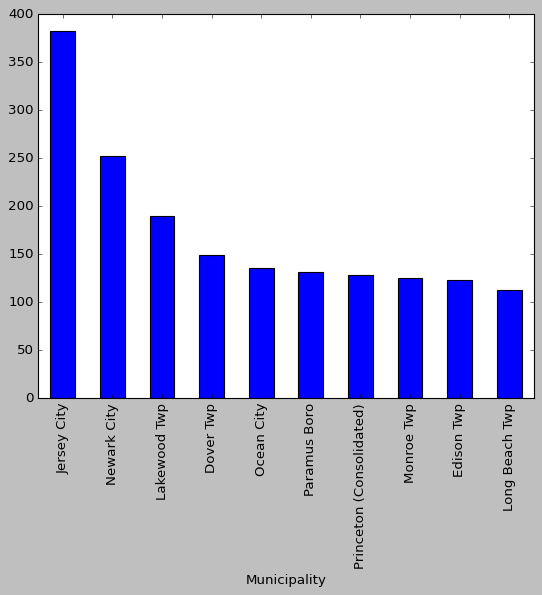

In [8]:
ax=test['TYPE'].plot(kind="bar")

##Merging the permits dataset with the municipal codes data set so that "County" can become a variable later on

In [9]:
codespermits = municodes.merge(permits, how='inner', on=['DCA'])
codespermits

,County,DCA,Municipality,Use Group Label,TYPE,WORK VALUE
0,Atlantic,101,Absecon City,Mercantile,NEW,"695,000"
1,Atlantic,101,Absecon City,Educational,ALT,"4,000,000"
2,Atlantic,102,Atlantic City,"Clubs, Dance Halls, Casinos, Restaurants, Tave...",ALT,"2,100,000"
3,Atlantic,102,Atlantic City,Residential (1 & 2 Family Homes),ALT,"2,100,000"
4,Atlantic,102,Atlantic City,"Churches, Libraries, Arcades, Comm. Halls, Gyms",ALT,"337,400"
...,...,...,...,...,...,...
9778,Warren,2121,Washington Boro,Residential (1 & 2 Family Homes),ALT,"1,000,000"
9779,Warren,2122,Washington Twp,Residential (1 & 2 Family Homes),ALT,"426,124"
9780,Warren,2122,Washington Twp,Educational,ALT,"742,000"
9781,Warren,2122,Washington Twp,Business,ALT,"276,000"


##Sorting numbers of large permits by County to begin reevaluating County Line as part of research investigation

In [10]:
test2 = codespermits.groupby('County').agg({'TYPE': 'count'})
test2

,TYPE
County,
Atlantic,406
Bergen,1294
Burlington,425
Camden,266
Cape May,530
Cumberland,73
Essex,731
Gloucester,227
Hudson,694


##Pretty bar graph showing numbers of large permits per county.

##Do note! Salem has fewest, which is one of the two counties with County Line ballot design. Sussex is close, but ~double what Salem has. Sets up need to continue massaging data to do same type of graph once number of municipalities per county are taken into account, county area/density, jobs, etc., as seen at the bottom in notes.

            TYPE
County          
Bergen      1294
Ocean        991
Monmouth     936
Middlesex    808
Essex        731
Hudson       694
Morris       595
Union        540
Cape May     530
Burlington   425
Mercer       416
Atlantic     406
Somerset     338
Camden       266
Gloucester   227
Passaic      168
Sussex       126
Hunterdon    102
Cumberland    73
Warren        60
Salem         57


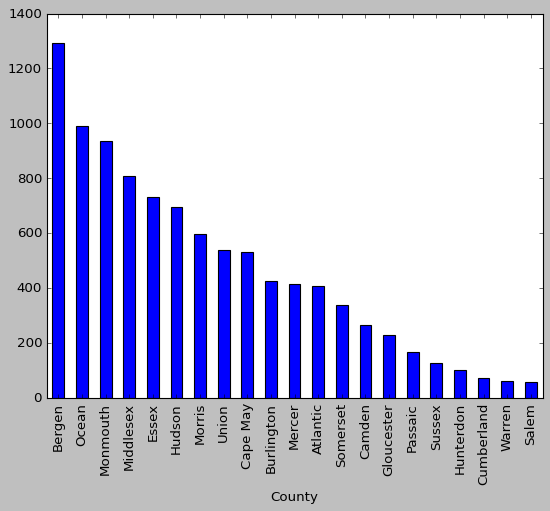

In [11]:
quiz1 = test2.sort_values(by=['TYPE'], ascending=False)
print (quiz1)
ax=quiz1['TYPE'].plot(kind="bar")

##Below, I tried to execute the same function to just count the number of municipalities per county, but something is weird with the municodes dataset.

##So, I tried the same code on the codespermits dataset and got the results below, which may actually be more important to the study because this shows the number of unique municipalities approving of at least one large dollar permit.

##Yes, there are 70 different municipalities in Bergen County, so, this suggests that every single town in Bergen County approved of at least one large dollar permit.

In [12]:
result = codespermits.groupby('County')['Municipality'].nunique().sort_values(ascending=False).reset_index(name='UniqueTowns')
result

,County,UniqueTowns
0,Bergen,70
1,Monmouth,48
2,Morris,38
3,Burlington,35
4,Ocean,28
5,Camden,27
6,Middlesex,23
7,Essex,22
8,Hunterdon,21
9,Union,20


In [13]:
trick = result.sort_values(['UniqueTowns', 'County'], ascending=[False, False])
trick

,County,UniqueTowns
0,Bergen,70
1,Monmouth,48
2,Morris,38
3,Burlington,35
4,Ocean,28
5,Camden,27
6,Middlesex,23
7,Essex,22
8,Hunterdon,21
9,Union,20


<Axes: title={'center': 'Unique Towns per County with at least 1 Large Permit'}, xlabel='County'>

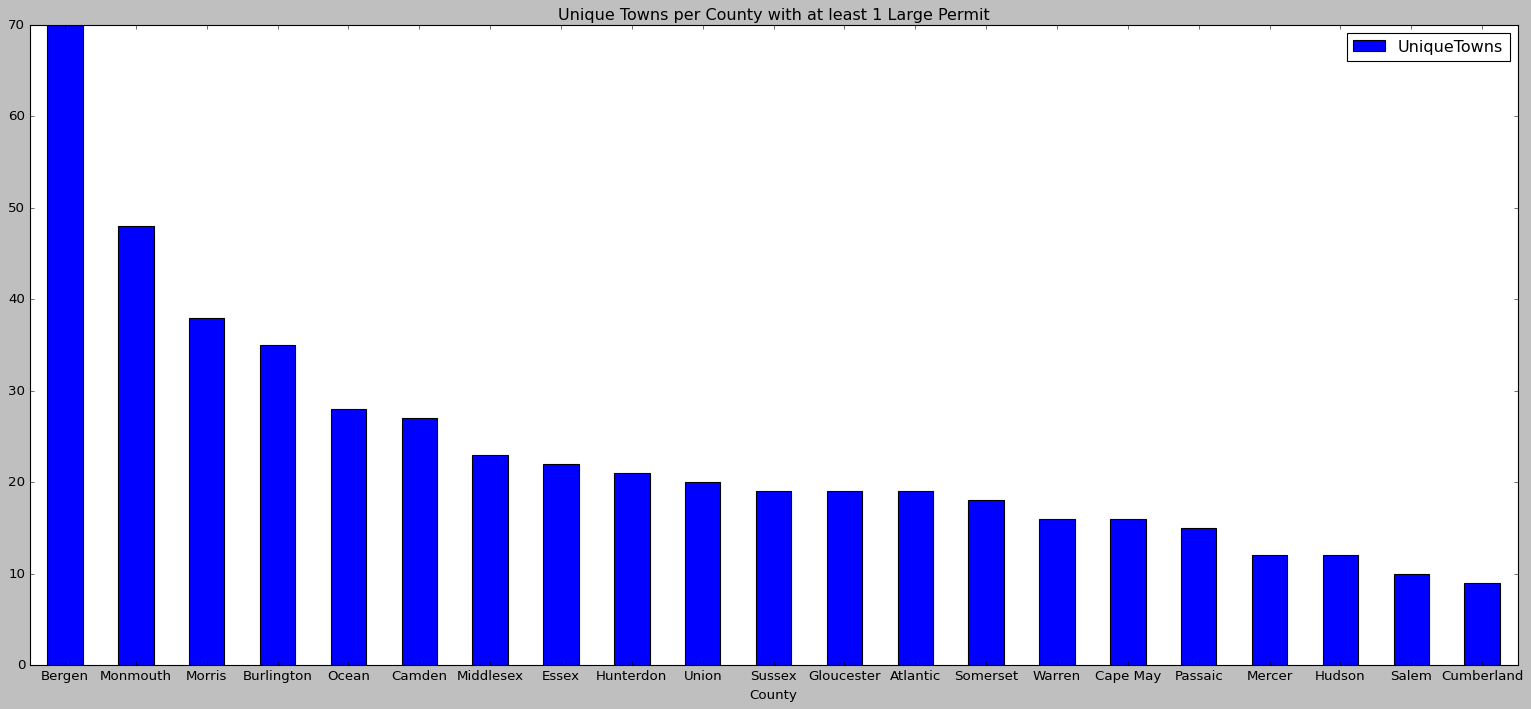

In [14]:
trick.plot.bar(x='County', y='UniqueTowns', title='Unique Towns per County with at least 1 Large Permit', rot=0, figsize=(24, 10))

In [15]:
jobs

,Blk_Grp_Name,Municipality,County,Jobs,JobsDensity,JobsVintage
0,"Essex County Tract 218.02, Block Group 3",West Caldwell Township,Essex,4376,4219.922635,Longitudinal Employer-Household Dynamics Origi...
1,"Essex County Tract 218.01, Block Group 2",West Caldwell Township,Essex,28,85.385941,Longitudinal Employer-Household Dynamics Origi...
2,"Essex County Tract 218.02, Block Group 2",West Caldwell Township,Essex,1939,1640.631286,Longitudinal Employer-Household Dynamics Origi...
3,"Gloucester County Tract 5016.08, Block Group 2",Monroe Township,Gloucester,226,589.619454,Longitudinal Employer-Household Dynamics Origi...
4,"Gloucester County Tract 5002.03, Block Group 2",West Deptford Township,Gloucester,156,258.364616,Longitudinal Employer-Household Dynamics Origi...
...,...,...,...,...,...,...
1995,"Monmouth County Tract 8096, Block Group 1",Marlboro Township,Monmouth,90,107.930966,Longitudinal Employer-Household Dynamics Origi...
1996,"Monmouth County Tract 8096, Block Group 4",Marlboro Township,Monmouth,243,233.244240,Longitudinal Employer-Household Dynamics Origi...
1997,"Monmouth County Tract 8097.01, Block Group 1",Marlboro Township,Monmouth,2738,745.848682,Longitudinal Employer-Household Dynamics Origi...
1998,"Bergen County Tract 101, Block Group 7",Dumont Borough,Bergen,10,80.075270,Longitudinal Employer-Household Dynamics Origi...


In [16]:
jobscount = jobs.groupby('County').agg({'Jobs': 'sum'})
jobscount

,Jobs
County,
Atlantic,798
Bergen,145042
Burlington,39024
Camden,76817
Essex,38091
Gloucester,65311
Hudson,182982
Hunterdon,16306
Mercer,133215


In [17]:
tony = jobscount.sort_values(['County', 'Jobs'], ascending=[True, False])
tony

,Jobs
County,
Atlantic,798
Bergen,145042
Burlington,39024
Camden,76817
Essex,38091
Gloucester,65311
Hudson,182982
Hunterdon,16306
Mercer,133215


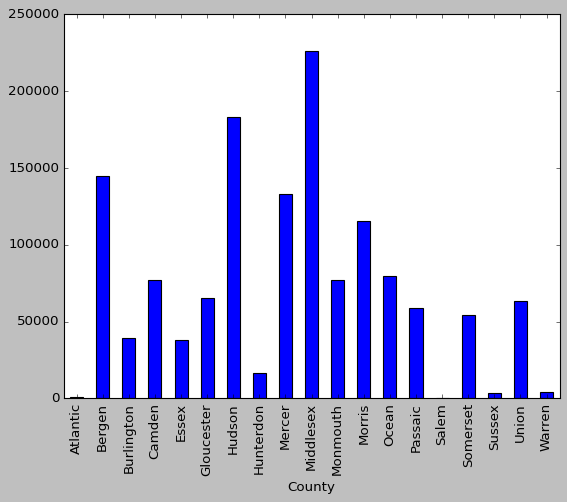

In [19]:
ax=tony['Jobs'].plot(kind="bar")

##Notes for future work:
Go back and add county for municipalities for Top 10 towns

Sort TYPE, see if it is worth sorting by use group label

Also! Sort Counties by number of municipalities. Could produce metric for number of towns per county versus permits once they are equalized. (probably need to ask Dr. M and AOK, can't think of term)

Produce new graphs with those changes, then MERGE with jobs density, find data set for county area/size.

##Notes for Data Information
Spoke with Joseph Naylor on the phone from NJ DCA

Learned that these permits come through a process governed by Division of Codes and Standards - these are building permits.

I may be confused about roles between Planning Boards and Zoning Boards of Adjustment.

Mr. Naylor did send me a link to the 2019 dataset which produced data at the level of $250K and higher.

He suggested that the new dataset (above) moved to be $499K and higher because they felt like the lower threshold did not do enough filtering, and was capturing too much. Still cannot download the 2019 dataset so I need to reach out once more.

The 2019 dataset will be great to have for comparision and longitude, but also might further confirm observed trends with many more observations.